In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np

In [59]:
out = np.random.random((10, 10, 2))

labels, preds = np.argmax(out, axis=2), np.max(out, axis=2)
labels.shape, preds.shape

((10, 10), (10, 10))

In [60]:
# for i in range(19):
#     x = predicted_prob[predicted_label==i]
#     if len(x) == 0:
#         thres.append(0)
#         continue        
#     x = np.sort(x)
#     thres.append(x[np.int(np.round(len(x)*0.66))])

In [61]:
from torchmetrics.classification import MulticlassJaccardIndex
import torch

In [62]:
m_iou = MulticlassJaccardIndex(num_classes=2)

In [63]:
m_iou(torch.ones((10, 10)), torch.ones((10, 10)))

tensor(0.5000)

In [64]:
m_iou

MulticlassJaccardIndex()

In [65]:
from FDA.utils import FDA_source_to_target_np

In [66]:
SIEMENS_PATH = '/raid/data/DA_BrainDataset/siemens3/df_save.csv'
PHILIPS_PATH = '/raid/data/DA_BrainDataset/philips3/df_save.csv'

In [67]:
from torchvision import transforms as TT
from data import SegmentationDataset

transforms = TT.Compose([
    TT.ToTensor()
])


dataset_A = SegmentationDataset(
    dataframe_path = SIEMENS_PATH,
    transform=transforms,
    mask_transform=transforms
)

dataset_B = SegmentationDataset(
    dataframe_path = PHILIPS_PATH,
    transform=transforms,
    mask_transform=transforms
)

len(dataset_A), len(dataset_B)

(10320, 10320)

In [68]:
FDA_source_to_target_np(dataset_A[50]['img'], dataset_B[50]['img']).shape

(1, 182, 218)

In [69]:
import numpy as np

In [84]:
img_a = dataset_A[3]['img']
img_b = dataset_B[3]['img']

In [108]:
res.shape

(182, 218, 1)

<Figure size 640x480 with 0 Axes>

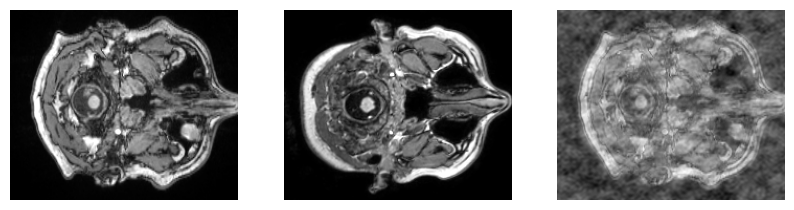

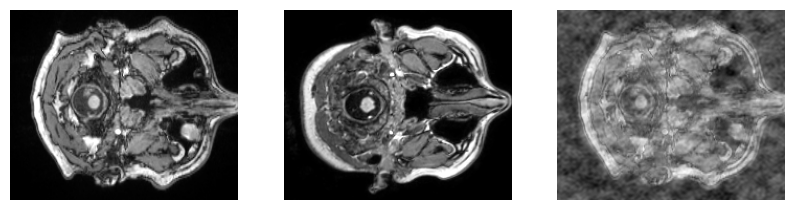

In [114]:
import matplotlib.pyplot as plt

from models.utils import beta_transform

BETA=0.26

plt.set_cmap('gray')

beta_transform(img_a, img_b, show=True, beta=BETA)

res = FDA_source_to_target_np(img_a, img_b, L=BETA)[0][:, :, None]

_, axes = plt.subplots(ncols=3, figsize=(10, 5))

axes[0].imshow(TT.ToPILImage()(img_a))
axes[1].imshow(TT.ToPILImage()(img_b))
axes[2].imshow(res)

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
pass

In [ ]:
from models.supervised_models import LitDeepLabV2

In [ ]:
models = [LitDeepLabV2.load_from_checkpoint(f'pretrained/deeplab_v2/model{i}.ckpt').eval() for i in range(1, 4)]
len(models)

3

In [ ]:
import torch.nn.functional as F

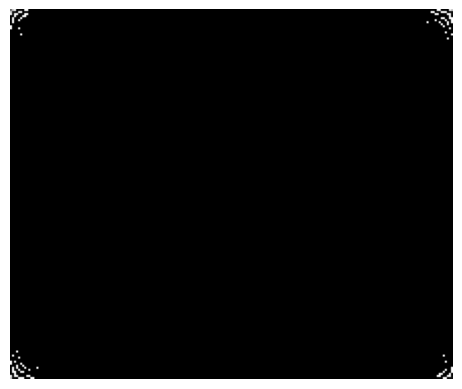

In [ ]:
a = torch.argmax(F.softmax(models[0](dataset_A[2000]['img'].unsqueeze(0)), dim=1), dim=1)
res = torch.fft.ifft2(a.squeeze())

plt.axis('off')
plt.imshow(TT.ToPILImage()(res.real))